# 1. Data Exploration

In [1]:
#importing my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing and reading the csv file of the datatset
import os
import chardet
notebook_path = os.getcwd()
print(notebook_path)
with open('youtubers_df.csv','rb') as f:
    result = chardet.detect(f.read())
print(result['encoding'])
dataset = pd.read_csv("youtubers_df.csv",encoding = 'utf-8')

C:\Users\Ikeoluwa\Documents\YOUTUBE STREAMERS DATA PROJECT FOR INTERN CARRER INTERNSHIP
utf-8


In [3]:
dataset.info() #This displays the general information about the dataset
dataset.dtypes #This displays the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

In [4]:
dataset.head() #this displays the first five rows of the dataset

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [5]:
dataset.describe() #This displays the basic statisitics for numerical columns

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [6]:
print(dataset.isnull().sum())  #checking for missing values

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


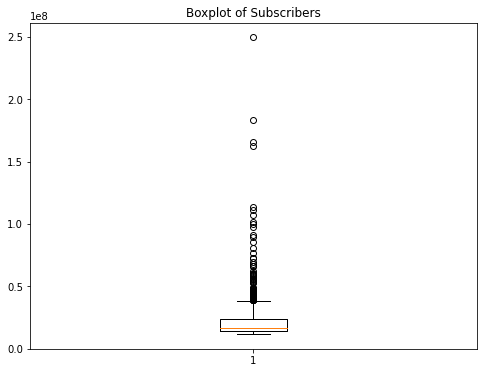

In [7]:
#Identifying outliers
#Creating a box plot to visualize the 'subscribers' column
plt.figure(figsize=(8,6))
plt.boxplot(dataset['Suscribers'])
plt.title('Boxplot of Subscribers')
plt.show()

In [8]:
#Removing Outliers
#Step 1: Calculating the interquartile range (IQR)
Q1 = dataset['Suscribers'].quantile(0.25)
Q3 = dataset['Suscribers'].quantile(0.75)
IQR = Q3-Q1
#Step 2: Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR 
#Step 3: Filter outliers
outliers_removed = dataset[(dataset['Suscribers'] > lower_bound) & (dataset['Suscribers'] < upper_bound)]
#Step 4: Displaying filtered Dataframe without outliers
outliers_removed

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
79,80,TheEllenShow,NaN,38300000.0,Estados Unidos,26000.0,433.0,22.0,http://youtube.com/channel/UCp0hYYBW6IMayGgR-W...
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
81,82,LikeNastya_ESP,NaN,38100000.0,Unknown,403800.0,1800.0,0.0,http://youtube.com/channel/UCpEJRZdSpdVZ8vh63T...
82,83,one31official,NaN,38100000.0,Tailandia,4800.0,122.0,1.0,http://youtube.com/channel/UC8f7MkX4MFOOJ2SerX...
83,84,ABPNEWS,NaN,38100000.0,India,2400.0,59.0,0.0,http://youtube.com/channel/UCRWFSbif-RFENbBrSi...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [9]:
outliers_removed.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
79,80,TheEllenShow,NaN,38300000.0,Estados Unidos,26000.0,433.0,22.0,http://youtube.com/channel/UCp0hYYBW6IMayGgR-W...
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
81,82,LikeNastya_ESP,NaN,38100000.0,Unknown,403800.0,1800.0,0.0,http://youtube.com/channel/UCpEJRZdSpdVZ8vh63T...
82,83,one31official,NaN,38100000.0,Tailandia,4800.0,122.0,1.0,http://youtube.com/channel/UC8f7MkX4MFOOJ2SerX...
83,84,ABPNEWS,NaN,38100000.0,India,2400.0,59.0,0.0,http://youtube.com/channel/UCRWFSbif-RFENbBrSi...


In [10]:
#removing null values
df_cleaned = outliers_removed.dropna()
df_cleaned

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...
90,91,RicisOfficial1795,"Música y baile, Películas",36900000.0,Indonesia,343800.0,27500.0,357.0,http://youtube.com/channel/UC4tS4Q_Cno5JVcIUXx...
...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000.0,Estados Unidos,359000.0,8800.0,342.0,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...
990,991,JoeHattab,Películas,11700000.0,Somalia,1900000.0,98500.0,2900.0,http://youtube.com/channel/UCe6eisvsctSPvBhmin...
991,992,BeAmazed,Educación,11700000.0,Estados Unidos,477800.0,9900.0,556.0,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...


In [11]:
youtubedata = df_cleaned

In [12]:
youtubedata.shape

(633, 9)

In [13]:
youtubedata.size

5697

In [14]:
youtubedata.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [15]:
youtubedata.describe() 

,Rank,Suscribers,Visits,Likes,Comments
count,633.000000,6.330000e+02,6.330000e+02,6.330000e+02,633.000000
mean,539.333333,1.829921e+07,1.027089e+06,4.633663e+04,1538.298578
std,263.771024,6.178550e+06,4.268851e+06,2.305840e+05,8222.198243
min,81.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,315.000000,1.360000e+07,3.430000e+04,5.350000e+02,3.000000
50%,535.000000,1.620000e+07,1.551000e+05,3.300000e+03,86.000000
75%,766.000000,2.110000e+07,7.683000e+05,2.270000e+04,505.000000
max,1000.000000,3.830000e+07,8.310000e+07,5.000000e+06,154000.000000


In [16]:
youtubedata.info() 
youtubedata.dtypes 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 80 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        633 non-null    int64  
 1   Username    633 non-null    object 
 2   Categories  633 non-null    object 
 3   Suscribers  633 non-null    float64
 4   Country     633 non-null    object 
 5   Visits      633 non-null    float64
 6   Likes       633 non-null    float64
 7   Comments    633 non-null    float64
 8   Links       633 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 49.5+ KB


Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

In [17]:
youtubedata.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...
90,91,RicisOfficial1795,"Música y baile, Películas",36900000.0,Indonesia,343800.0,27500.0,357.0,http://youtube.com/channel/UC4tS4Q_Cno5JVcIUXx...


In [18]:
print(youtubedata.isnull().sum())  

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64


# 2. Trend Analysis

In [20]:
#Here I want to determine which category generally is most popular
category_counts = youtubedata['Categories'].value_counts().nlargest(10) #Exploring unique values
category_counts

Música y baile               132
Películas, Animación          53
Música y baile, Películas     40
Vlogs diarios                 36
Noticias y Política           35
Animación, Videojuegos        34
Películas, Humor              32
Animación, Humor              26
Animación, Juguetes           24
Películas                     23
Name: Categories, dtype: int64

### From this, looking at the top ten most popular categories, we can observe that generally 'Música y baile' has the most engagements. That this particular type of content seems to attract a lot of people.

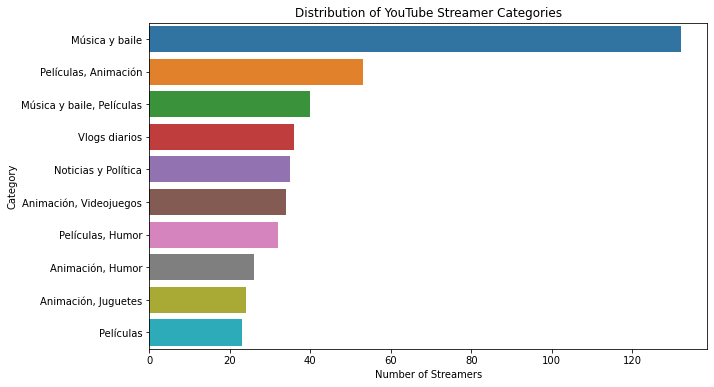

In [21]:
#Plotting the distributions of categories
plt.figure(figsize=(10,6))
sns.countplot(y='Categories', data=youtubedata, order=youtubedata['Categories'].value_counts().nlargest(10).index)
plt.title('Distribution of YouTube Streamer Categories')
plt.xlabel('Number of Streamers')
plt.ylabel('Category')
plt.show()

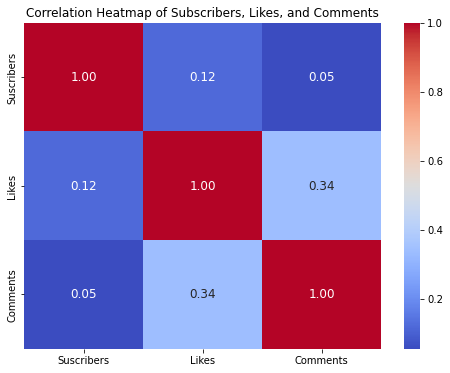

In [22]:
# Select the columns of interest (Subscribers, Likes, Comments) for correlation analysis
columns_of_interest = ['Suscribers', 'Likes', 'Comments']
selected_columns = youtubedata[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = selected_columns.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Correlation Heatmap of Subscribers, Likes, and Comments')
plt.show()

### From this we can see that there is a weak correlation between Suscribers and like/comments

# 3. Audience Study

In [23]:
youtubedata.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...
90,91,RicisOfficial1795,"Música y baile, Películas",36900000.0,Indonesia,343800.0,27500.0,357.0,http://youtube.com/channel/UC4tS4Q_Cno5JVcIUXx...


In [24]:
youtubedata['Country'].unique()

array(['Colombia', 'Unknown', 'India', 'Indonesia', 'Estados Unidos',
       'México', 'Iraq', 'Brasil', 'Filipinas', 'Argentina', 'Turquía',
       'Rusia', 'Tailandia', 'Arabia Saudita', 'Bangladesh',
       'Reino Unido', 'Perú', 'España', 'Egipto', 'Pakistán', 'Jordania',
       'Francia', 'Marruecos', 'Singapur', 'Argelia', 'Japón', 'Somalia'],
      dtype=object)

In [25]:
y = youtubedata['Categories'].loc[dataset['Country'] == 'India'].value_counts().nlargest(10).values
y

array([30, 18, 13, 10,  7,  4,  4,  3,  1,  1], dtype=int64)

In [26]:
x = youtubedata['Categories'].loc[dataset['Country'] == 'India'].value_counts().nlargest(10).keys()
x

Index(['Música y baile', 'Noticias y Política', 'Vlogs diarios', 'Educación',
       'Películas, Humor', 'Películas, Animación', 'Películas', 'Humor',
       'Películas, Videojuegos', 'Música y baile, Humor'],
      dtype='object')

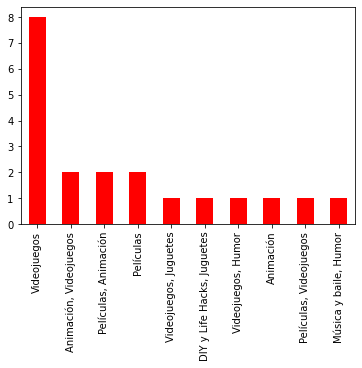

In [46]:
youtubedata['Categories'].loc[dataset['Country'] == 'Rusia'].value_counts().nlargest(10).plot(kind='bar',rot=90,color = 'red')
plt.show()

### This plot shows engagements for the top 10 categories in India where 'Música y baile' still has the highest number of engagements.

# 4. Performance Metrics

In [29]:
# Calculating average metrics: subscribers, visits, likes and comments
average_subscribers = youtubedata['Suscribers'].mean()
average_visits = youtubedata['Visits'].mean()
average_likes = youtubedata['Likes'].mean()
average_comments = youtubedata['Comments'].mean()
print('Average Subscribers:',average_subscribers)
print('Average visits:',average_visits)
print('Average likes:',average_likes)
print('Average Comments:',average_comments)

Average Subscribers: 18299210.11058452
Average visits: 1027088.6255924171
Average likes: 46336.62559241706
Average Comments: 1538.2985781990521


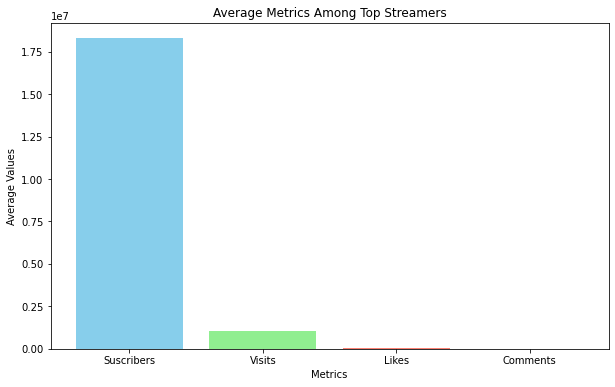

In [30]:
metrics =['Suscribers','Visits','Likes','Comments']
average_values = [average_subscribers, average_visits, average_likes, average_comments]
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']
plt.figure(figsize=(10,6))
plt.bar(metrics, average_values, color=colors)
plt.title('Average Metrics Among Top Streamers')
plt.xlabel('Metrics')
plt.ylabel('Average Values')
plt.show()

## Brief Explanantion
This code snippet computes the average values for different metrics (subscribers, visits, likes, comments) among the top streamers and visualizes these averages using a bar plot. Here's a breakdown:
1. Calculating Average Metrics:

The code calculates the mean values (averages) for subscribers, visits, likes, and comments by using the mean() function on the respective columns in the youtubedata DataFrame.
2. Printing Average Metrics:

It prints out the average values calculated for subscribers, visits, likes, and comments using print() statements.
3. Creating a Bar Plot for Average Metrics:

The code then prepares data for visualization by creating lists containing metric names (metrics) and their corresponding average values (average_values). It also defines colors for each metric.

Using plt.bar(), it generates a bar plot with metrics on the x-axis and their average values on the y-axis. Each metric's average value is represented by a colored bar.
4. Interpreting Patterns or Anomalies:

By observing the bar plot, you can analyze patterns or anomalies in these metrics among the top streamers. For example:

Patterns: Consistent or expected values across metrics may indicate stable performance or behavior among top streamers.
Anomalies: Unusual spikes or drops in specific metrics compared to others might signify irregular behavior or outliers among certain streamers.
Additionally, comparing these metrics across different time periods or against industry benchmarks can help in identifying deviations or trends.

This visualization allows for a quick overview and comparison of the average performance metrics among top streamers, aiding in identifying any significant deviations or noteworthy patterns across these metrics.

# 5. Content Categories

In [31]:
#1.)Analyzing the Distribution of Content Categories
#Counting the number of streamers in each content category
streamers_by_category = youtubedata['Categories'].value_counts()
#Displaying the top categories with the most streamers
top_categories = streamers_by_category.head(10)
print("Top Categories by Number of Streamers:")
top_categories

Top Categories by Number of Streamers:


Música y baile               132
Películas, Animación          53
Música y baile, Películas     40
Vlogs diarios                 36
Noticias y Política           35
Animación, Videojuegos        34
Películas, Humor              32
Animación, Humor              26
Animación, Juguetes           24
Películas                     23
Name: Categories, dtype: int64

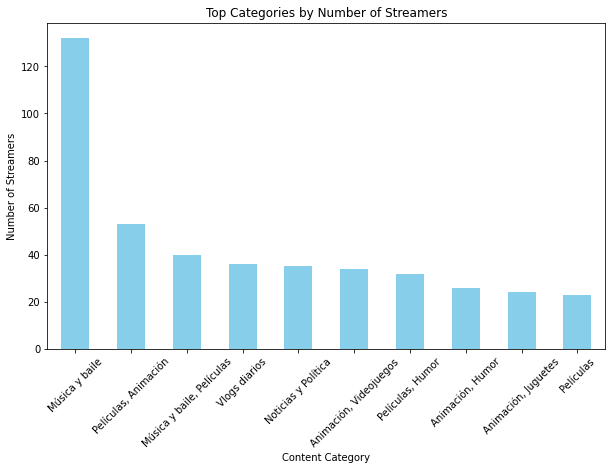

In [32]:
#2.)Visualizing the distribution of streamers by content category
# Plotting the distribution of streamers by content category (top 10 categories)
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top Categories by Number of Streamers')
plt.xlabel('Content Category')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45)
plt.show()


In [33]:
#Identifying Categories with Exceptional performance metrics
#first of all calculating average metrics for each category
average_metrics_by_category = youtubedata.groupby('Categories')[['Likes','Comments']].mean()

In [34]:
#Comparing Average Metrics and Identifying Exceptional Categories
#Calculating thresholds for exceptional performance
threshold_likes = average_metrics_by_category['Likes'].quantile(0.75)
threshold_comments = average_metrics_by_category['Comments'].quantile(0.75)
# Identify categories with exceptional performance based on the chosen thresholds
exceptional_categories = average_metrics_by_category[
    (average_metrics_by_category['Likes'] > threshold_likes) &
    (average_metrics_by_category['Comments'] > threshold_comments)
]

In [35]:
threshold_likes

57143.75

In [36]:
threshold_comments

1677.0

In [37]:
exceptional_categories

,Likes,Comments
Categories,,
"Animación, Humor",138667.115385,4704.384615
"Animación, Videojuegos",79294.029412,3786.617647
Animales y mascotas,102750.000000,2806.000000
Comida y bebida,128664.750000,3053.416667
"Diseño/arte, DIY y Life Hacks",127300.000000,2200.000000
Humor,169990.000000,5159.800000
"Videojuegos, Humor",115543.750000,3972.500000


## Brief Explanation
This code snippet performs the following tasks:
1. Counting Streamers in Each Content Category:

It counts the number of streamers present in each content category by using the value_counts() function on the 'Categories' column of the youtubedata DataFrame. This creates a Series (streamers_by_category) showing the count of streamers in each category.
2. Displaying Top Categories by Number of Streamers:

It displays the top categories with the most streamers by taking the top 10 categories from the streamers_by_category Series using head(10) and printing the result.
3. Visualizing the Distribution of Streamers by Content Category:

It creates a bar plot to visualize the distribution of streamers across the top 10 categories. This plot shows the number of streamers on the y-axis and content categories on the x-axis, providing a visual representation of the streamer distribution among different categories.
4. Identifying Categories with Exceptional Performance Metrics:

It calculates the average metrics (likes and comments) for each content category using groupby() and mean() functions, creating a DataFrame named average_metrics_by_category.

Then, it sets thresholds for exceptional performance based on the 75th percentile (quantile(0.75)) of likes and comments separately for each category.

Finally, it identifies categories where the average likes and comments exceed these thresholds, storing these exceptional categories in the DataFrame exceptional_categories.



This code helps in analyzing the distribution of streamers across various content categories and identifies categories that have a higher number of streamers, as well as categories exhibiting exceptional performance metrics (likes and comments) compared to the average across all categories. Adjustments in the thresholds or metric comparisons can be made based on specific criteria or business requirements.

# 6. Brands and Collaborations: 

In [38]:
#Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.
# Calculate performance metrics (e.g., likes, comments) by aggregating data per streamer
streamer_performance = youtubedata.groupby('Username')['Likes', 'Comments', 'Suscribers'].sum()

# Consider a threshold for high performance based on your criteria
threshold_likes = streamer_performance['Likes'].quantile(0.75)
threshold_comments = streamer_performance['Comments'].quantile(0.75)
threshold_subscribers = streamer_performance['Suscribers'].quantile(0.75)

# Identify streamers with high performance based on the chosen thresholds
high_performance_streamers = streamer_performance[
    (streamer_performance['Likes'] >= threshold_likes) &
    (streamer_performance['Comments'] >= threshold_comments) &
    (streamer_performance['Suscribers'] >= threshold_subscribers)
]


In [39]:
#Analyzing Brand Collaborations for High-Performance Streamers:
# Check if high-performance streamers have more brand collaborations

# Count brand collaborations for high-performance streamers
print("High-Performing Content Creators:")
print(high_performance_streamers[[ 'Suscribers', 'Likes', 'Comments']])

High-Performing Content Creators:
                          Suscribers      Likes  Comments
Username                                                 
AboFlah                   32700000.0   382000.0   11400.0
AlejoIgoa                 25700000.0   208400.0    1700.0
AmiRodrigueZZ             22900000.0   294400.0    1300.0
BenAzelart                22500000.0    44900.0    2700.0
DaFuqBoom                 29800000.0  1700000.0   82800.0
DanTDM                    27800000.0   285000.0   52500.0
JamesCharles              23900000.0    62300.0    1100.0
LosPolinesios             25700000.0    38400.0     866.0
MrBeast2                  31300000.0  5000000.0   11600.0
NichLmao                  27500000.0    85800.0    1600.0
RAFAELUIZOFICIAL          22100000.0    30500.0     522.0
SSSniperWolf              34200000.0    34600.0    2100.0
SSundee                   22700000.0    59800.0    1800.0
SandeepSeminars           28000000.0    58500.0    4000.0
StokesTwins               22700000.0  

## Brief Explanation
This code segment initially calculates performance metrics (likes, comments, subscribers) by aggregating the data per streamer using the groupby() function in pandas:

1. Aggregating Performance Metrics:It groups the data in the 'youtubedata' DataFrame by the 'Username' column and aggregates the total likes, comments, and subscribers for each individual streamer using the 'sum()' function. This creates a new DataFrame called 'streamer_performance' that shows the total metrics for each streamer.
2. Setting Thresholds for High Performance:The code then calculates thresholds for high performance by finding the 75th percentile (quantile of 0.75) of likes, comments, and subscribers separately using the 'quantile()' function. These thresholds ('threshold_likes', 'threshold_comments', 'threshold_subscribers') will be used to define high-performance streamers.
3. Identifying High-Performance Streamers:Next, it filters the 'streamer_performance' DataFrame to identify streamers whose total likes, comments, and subscribers are equal to or higher than the calculated thresholds for high performance. This creates a new DataFrame called 'high_performance_streamers' containing the streamers meeting these criteria.
4. Checking Brand Collaborations (not implemented in the provided code snippet): The code snippet you provided ends with displaying information about high-performance streamers ('high_performance_streamers[[ 'Suscribers', 'Likes', 'Comments']]'). However, there isn't explicit code in this snippet to check or count brand collaborations for these high-performance streamers.

To analyze whether high-performance streamers have more brand collaborations or marketing campaigns, you'd need additional data or columns indicating brand collaborations. This could involve integrating columns related to brand partnerships or collaboration counts for each streamer in the dataset.

This snippet prepares the identification of high-performance streamers based on set performance thresholds but lacks the specific analysis or counting of brand collaborations for these identified high-performance streamers. Integration of relevant brand collaboration data would be needed to perform that analysis effectively.

# 7. Benchmarking

In [42]:
#- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
# Identify top-performing content creators based on above-average metrics
# Calculate average metrics
average_likes = youtubedata['Likes'].mean()
average_comments = youtubedata['Comments'].mean()
average_subscribers = youtubedata['Suscribers'].mean()

# Filter top performers based on above-average metrics
top_performers = youtubedata[
    (youtubedata['Likes'] > average_likes) &
    (youtubedata['Comments'] > average_comments) &
    (youtubedata['Suscribers'] > average_subscribers)
]

# Sort by different metrics to get top performers for each metric
top_likes = top_performers.nlargest(10, 'Likes')[['Username', 'Likes']]
top_comments = top_performers.nlargest(10, 'Comments')[['Username', 'Comments']]
top_subscribers = top_performers.nlargest(10, 'Suscribers')[['Username', 'Suscribers']]

# Display top 10 performers for each metric
print("Top 10 Performers by Likes:")
print(top_likes)
print("\nTop 10 Performers by Comments:")
print(top_comments)
print("\nTop 10 Performers by Subscribers:")
print(top_subscribers)

Top 10 Performers by Likes:
                     Username      Likes
136                  MrBeast2  5000000.0
153                 DaFuqBoom  1700000.0
341           triggeredinsaan  1400000.0
238                alanbecker   582600.0
306  khangsresearchcentre1685   501700.0
366                    Vsauce   449000.0
131              fedevigevani   412200.0
401           IanLucasOficial   401700.0
282      souravjoshivlogs7028   382300.0
122                   AboFlah   382000.0

Top 10 Performers by Comments:
                     Username  Comments
153                 DaFuqBoom   82800.0
177                    DanTDM   52500.0
341           triggeredinsaan   38000.0
132                     dream   19000.0
131              fedevigevani   17000.0
306  khangsresearchcentre1685   17000.0
318                kurzgesagt   14000.0
136                  MrBeast2   11600.0
122                   AboFlah   11400.0
278               StokesTwins   10000.0

Top 10 Performers by Subscribers:
            Us

## Brief Explanation

This code segment aims to identify and display the top ten content creators based on different performance metrics (likes, comments, subscribers). Here's a breakdown:
1. Calculating Average Metrics:The code starts by calculating the average values for 'likes','comments', and 'subscribers' from the 'Likes', 'Comments', and 'Subscribers' columns of the 'youtubedata' DataFrame using the 'mean()' function.

2. Filtering Top Performers:It filters the 'youtubedata' DataFrame to find content creators whose metrics (likes, comments, subscribers) are higher than the average values calculated earlier. This is done using boolean indexing and the '&' operator to combine conditions.
3. Identifying Top Performers for Each Metric:For each metric (likes, comments, subscribers), it sorts the filtered DataFrame ('top_performers') in descending order based on that specific metric using the 'nlargest()' function. This function selects the top ten performers for each metric separately.
4. Displaying Top Performers:The code then displays the top ten performers for each metric in a tabular format. It prints the usernames of the content creators along with their corresponding metric values (likes, comments, subscribers).

In summary, this code snippet helps to identify and display the top ten content creators separately for likes, comments, and subscribers based on their performance metrics, providing insights into the top-performing creators in each category. Adjust the column names ('Likes', 'Comments', 'Subscribers') in the code to match your actual dataset columns if they are different.


# 8. Content Recommendations:

In [41]:
from sklearn.metrics import jaccard_score

# Function to recommend similar content creators based on categories using Jaccard similarity
def recommend_similar_creators(username, df=youtubedata):
    try:
        user_categories = set(df[df['Username'] == username]['Categories'].iloc[0].split(','))

        similar_creators = []
        for _, row in df.iterrows():
            if row['Username'] != username:
                other_user_categories = set(row['Categories'].split(','))
                
                # Handling empty sets or different lengths
                if len(user_categories) == 0 or len(other_user_categories) == 0:
                    similarity_score = 0.0  # Consider them dissimilar
                else:
                    try:
                        similarity_score = jaccard_score(user_categories, other_user_categories)
                    except ValueError:
                        similarity_score = 0.0  # In case of ValueError, consider them dissimilar

                similar_creators.append((row['Username'], similarity_score))

        similar_creators = sorted(similar_creators, key=lambda x: x[1], reverse=True)[:10]  # Get top 10 similar creators
        return [username for username, _ in similar_creators]
    except IndexError:
        return "Username not found or insufficient data for recommendations."
    
#Calling the function    
recommendations = recommend_similar_creators('TotalGaming093', df=youtubedata)

# Print recommendations
print("Recommended similar creators:", recommendations)

Recommended similar creators: ['DaddyYankee', 'MariaClaraeJP', 'PowerKidstv', 'SaregamaMusic', 'RicisOfficial1795', 'IndiaTV', 'LaGranjaDeZenon', 'tseriesoldisgold', 'Ozuna', 'GenevievesPlayhouse']


## Brief Explanation

The code defines a function called recommend_similar_creators that aims to find content creators similar to a specified username based on shared categories. Here's a breakdown:

1. Comparing Categories:
When you provide a username as input to the function, it extracts the categories associated with that username from the DataFrame. Then, it iterates through each content creator in the DataFrame, excluding the provided username.
2. Calculating Similarity:
For each other content creator, it looks at the categories they are associated with and computes a similarity score (using Jaccard similarity) between their categories and the categories of the specified username.
3. Creating Recommendations:
The function collects these similarity scores for all creators, sorts them in descending order, and selects the top 10 creators who share the most similar content categories with the specified username. Finally, it returns a list of usernames as recommendations for similar content creators.

Overall, the function helps find YouTube content creators who produce content similar to a particular user based on shared categories of content.